# Exploratory Data Analysis

In [ ]:
!pip install empiricaldist
import empiricaldist as emp

  Created wheel for empiricaldist: filename=empiricaldist-0.6.1-cp37-none-any.whl size=10629 sha256=d5f4be3a0ff966144d300a894512a688350e34caec346082a72a0c85586ab7db
  Stored in directory: /root/.cache/pip/wheels/9d/93/b1/92742aa428b2a83dd6aa6ece18a908f7e38c15895b1c37a462
Successfully built empiricaldist


load library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

Load the csv file

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AH_Monthly_provisional_counts_of_deaths_by_age_group__sex__and_race_ethnicity_for_select_causes_of_death.csv", index_col=0)
df.head()

,Date.Of.Death.Year,Date.Of.Death.Month,Sex,Race.Ethnicity,AgeGroup,AllCause,NaturalCause,Septicemia..A40.A41.,Malignant.neoplasms..C00.C97.,Diabetes.mellitus..E10.E14.,Alzheimer.disease..G30.,Influenza.and.pneumonia..J09.J18.,Chronic.lower.respiratory.diseases..J40.J47.,Other.diseases.of.respiratory.system..J00.J06.J30.J39.J67.J70.J98.,Nephritis..nephrotic.syndrome.and.nephrosis..N00.N07.N17.N19.N25.N27.,Symptoms..signs.and.abnormal.clinical.and.laboratory.findings..not.elsewhere.classified..R00.R99.,Diseases.of.heart..I00.I09.I11.I13.I20.I51.,Cerebrovascular.diseases..I60.I69.,COVID.19..U071..Multiple.Cause.of.Death.,COVID.19..U071..Underlying.Cause.of.Death.,Start.Date,End.Date,Jurisdiction.of.Occurrence
1,2019,1,F,Hispanic,0-4 years,182.0,162.0,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,22.0,NaN,0.0,0.0,0.0,01/01/2019,01/31/2019,United States
2,2019,1,F,Hispanic,5-14 years,44.0,28.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,01/01/2019,01/31/2019,United States
3,2019,1,F,Hispanic,15-24 years,122.0,45.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,01/01/2019,01/31/2019,United States
4,2019,1,F,Hispanic,25-34 years,198.0,100.0,NaN,29.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,01/01/2019,01/31/2019,United States
5,2019,1,F,Hispanic,35-44 years,334.0,260.0,NaN,96.0,NaN,0.0,11.0,NaN,NaN,NaN,NaN,25.0,10.0,0.0,0.0,01/01/2019,01/31/2019,United States


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Sort the column values 

In [ ]:
df['NaturalCause'].value_counts().sort_index()

0.0        13
10.0       14
11.0       14
12.0       15
13.0       10
           ..
41621.0     1
43113.0     1
43130.0     1
48025.0     1
52054.0     1
Name: NaturalCause, Length: 1288, dtype: int64

# Describe the column values

In [ ]:

print(df['NaturalCause'].describe())
print(df.NaturalCause.isnull().sum())

count     2717.000000
mean      2194.944056
std       5945.745418
min          0.000000
25%         70.000000
50%        216.000000
75%       1294.000000
max      52054.000000
Name: NaturalCause, dtype: float64
283


In [ ]:
print(df['Diabetes.mellitus..E10.E14.'].describe())
print(df.AllCause.isnull().sum())

count    2127.000000
mean       90.301834
std       170.424524
min         0.000000
25%         0.000000
50%        19.000000
75%        97.000000
max       984.000000
Name: Diabetes.mellitus..E10.E14., dtype: float64
151


In [ ]:
print(df['Septicemia..A40.A41.'].describe())
print(df.AllCause.isnull().sum())

count    1736.000000
mean       44.580069
std        88.269978
min         0.000000
25%         0.000000
50%        10.000000
75%        36.000000
max       484.000000
Name: Septicemia..A40.A41., dtype: float64
151


In [ ]:
df.describe()

,Date.Of.Death.Year,Date.Of.Death.Month,AllCause,NaturalCause,Septicemia..A40.A41.,Malignant.neoplasms..C00.C97.,Diabetes.mellitus..E10.E14.,Alzheimer.disease..G30.,Influenza.and.pneumonia..J09.J18.,Chronic.lower.respiratory.diseases..J40.J47.,Other.diseases.of.respiratory.system..J00.J06.J30.J39.J67.J70.J98.,Nephritis..nephrotic.syndrome.and.nephrosis..N00.N07.N17.N19.N25.N27.,Symptoms..signs.and.abnormal.clinical.and.laboratory.findings..not.elsewhere.classified..R00.R99.,Diseases.of.heart..I00.I09.I11.I13.I20.I51.,Cerebrovascular.diseases..I60.I69.,COVID.19..U071..Multiple.Cause.of.Death.,COVID.19..U071..Underlying.Cause.of.Death.
count,3000.00000,3000.000000,2849.000000,2717.000000,1736.000000,2249.000000,2127.000000,2465.000000,1721.000000,1902.000000,1713.000000,1915.000000,1646.000000,2257.000000,1903.000000,2697.000000,2705.000000
mean,2019.56000,6.280000,2280.159354,2194.944056,44.580069,549.167185,90.301834,106.763083,59.506101,165.209779,51.633975,54.495039,56.221750,617.635357,166.369417,169.790508,154.812569
std,0.57141,3.550465,6028.864306,5945.745418,88.269978,1277.215975,170.424524,468.441964,138.795169,435.135083,118.120996,115.834956,111.205503,1624.844848,428.784981,805.541868,727.679060
min,2019.00000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.00000,3.000000,86.000000,70.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,0.000000
50%,2020.00000,6.000000,271.000000,216.000000,10.000000,69.000000,19.000000,0.000000,14.000000,12.000000,11.000000,10.000000,20.000000,60.000000,25.000000,0.000000,0.000000
75%,2020.00000,9.000000,1498.000000,1294.000000,36.000000,338.000000,97.000000,16.000000,45.000000,74.000000,37.000000,48.500000,46.000000,414.000000,121.000000,24.000000,21.000000
max,2021.00000,12.000000,53242.000000,52054.000000,484.000000,6498.000000,984.000000,4732.000000,1216.000000,2408.000000,666.000000,653.000000,1127.000000,11502.000000,3352.000000,14770.000000,12932.000000


**Univariate**

histrogram for Natural cause 

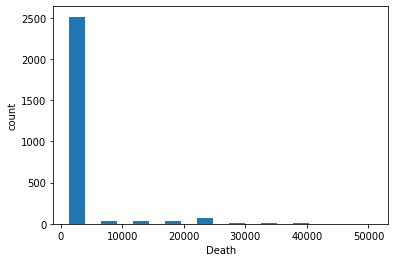

In [ ]:
plt.hist(df.NaturalCause, rwidth = 0.5)
plt.xlabel('Death')
plt.ylabel('count')
plt.show() 


from the above graph we can see that a little right skewness is observed. Also we can see that an unusual observions around 25000 death count.

**Plotting histogram for Diabetes.mellitus**

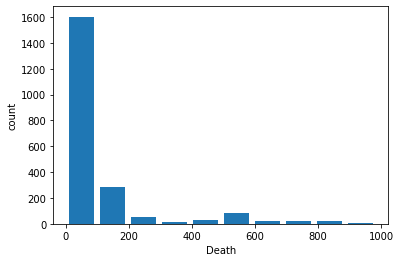

In [ ]:
plt.hist(df['Diabetes.mellitus..E10.E14.'], rwidth = 0.8)
plt.xlabel('Death')
plt.ylabel('count')
plt.show() 

This is right skewness data so I have to remove the skewness of data. And unsuall activity seems betwwen 400 to 500 death ratio.

**Plotting histogram for Septicemia Column (Univariate Distribution)**


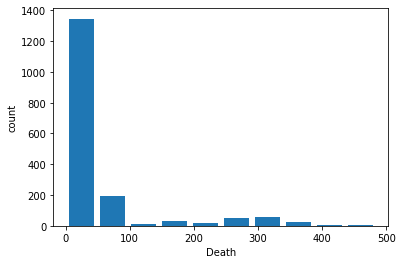

In [ ]:
plt.hist(df['Septicemia..A40.A41.'], rwidth = 0.8)
plt.xlabel('Death')
plt.ylabel('count')
plt.show()



*   Acording to above graph, there is a right skewness in the data and also unusual behavior is observed around 300. So we need to remove the skewness here.



**(1)univariate** **analysis**

**Numerical** **Vriable**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


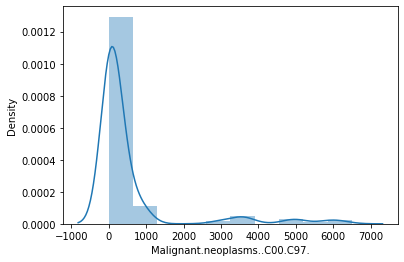

In [ ]:
sns.distplot(df['Malignant.neoplasms..C00.C97.'],bins=10)

# Removing Skewness of the column  

Natural Cause Column

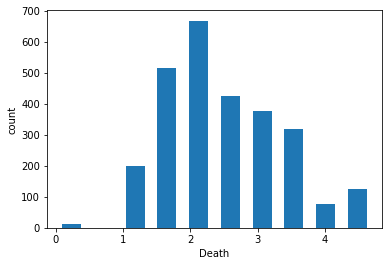

In [ ]:
l_NaturalCause = df.NaturalCause.dropna()
l_NaturalCause = np.log10(l_NaturalCause+1)
plt.hist(l_NaturalCause, rwidth = 0.6)
plt.xlabel('Death')
plt.ylabel('count')
plt.show() 

From the above visulization we can easily see that, We tried to remove skewness. 

**Diabetes.mellitus column**

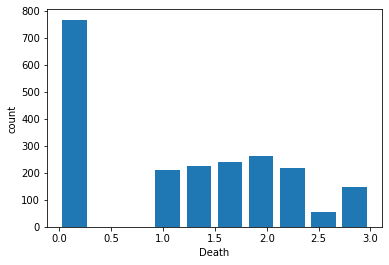

In [ ]:
log_Diabetes= df['Diabetes.mellitus..E10.E14.'].dropna()
log_Diabetes = np.log10(log_Diabetes+1)
plt.hist(log_Diabetes, rwidth = 0.8)
plt.xlabel('Death')
plt.ylabel('count')
plt.show() 

**Septicemia Column**

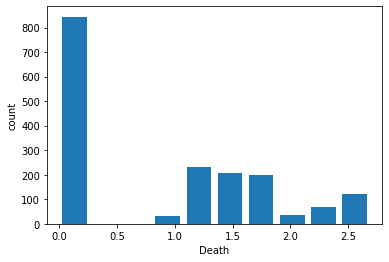

In [ ]:
log_Septicemia = df['Septicemia..A40.A41.'].dropna()
log_Septicemia = np.log10(log_Septicemia+1)
plt.hist(log_Septicemia, rwidth = 0.8)
plt.xlabel('Death')
plt.ylabel('count')
plt.show() 

*   By observing the above graph, we can clearly see that right skewness is removed.

# Distibution of data

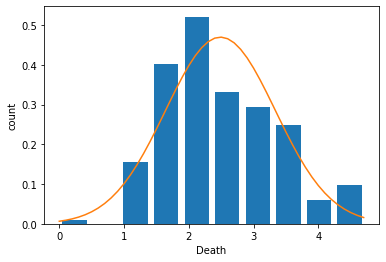

In [ ]:
from scipy.stats import norm

plt.hist(l_NaturalCause, rwidth = 0.8, density=True)
plt.xlabel('Death')
plt.ylabel('count')

rng = np.arange(l_NaturalCause.min(), l_NaturalCause.max(),0.1)
plt.plot(rng,norm.pdf(rng, l_NaturalCause.mean(), l_NaturalCause.std()))

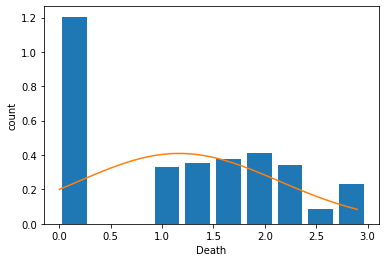

In [ ]:
from scipy.stats import norm

plt.hist(log_Diabetes, rwidth = 0.8, density=True)
plt.xlabel('Death')
plt.ylabel('count')

rng = np.arange(log_Diabetes.min(), log_Diabetes.max(),0.1)
plt.plot(rng,norm.pdf(rng, log_Diabetes.mean(), log_Diabetes.std()))

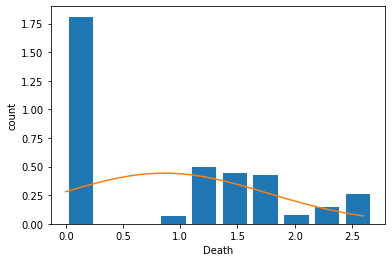

In [ ]:
from scipy.stats import norm

plt.hist(log_Septicemia, rwidth = 0.8, density=True)
plt.xlabel('Death')
plt.ylabel('count')

rng = np.arange(log_Septicemia.min(), log_Septicemia.max(),0.1)
plt.plot(rng,norm.pdf(rng, log_Septicemia.mean(), log_Septicemia.std()))

for the clear distrubiton of the data i draw the curve line to know the data variations due to natural cause in number of death

# Outliers in column

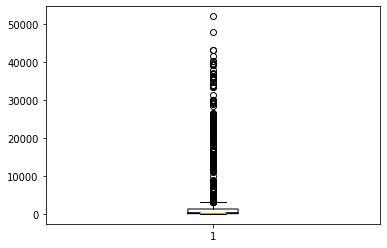

In [ ]:
plt.boxplot(df.NaturalCause.dropna(), 1)
plt.show()

In the above graph we can  see that there are many outliers in dataset

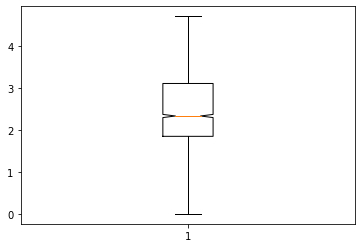

In [ ]:
plt.boxplot(l_NaturalCause, 1)
plt.show()

From the above logarithm box plot of natural cause diseases,it is clrealy seen that no outliers in the data.

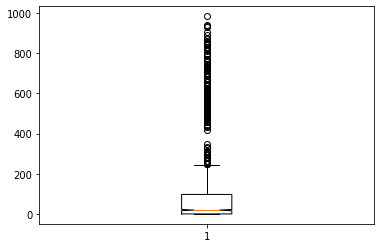

In [ ]:
plt.boxplot(df['Diabetes.mellitus..E10.E14.'].dropna(), 1)
plt.show()

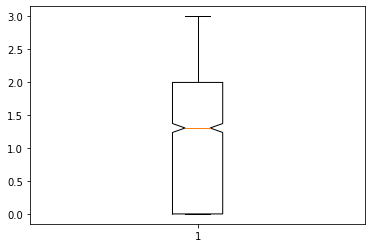

In [ ]:
plt.boxplot(log_Diabetes, 1)
plt.show()

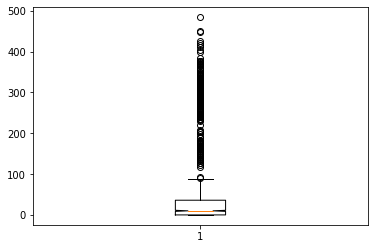

In [ ]:
plt.boxplot(df['Septicemia..A40.A41.'].dropna(), 1)
plt.show()

In the above graph, we can clearly see that there are so many outliers are identified.

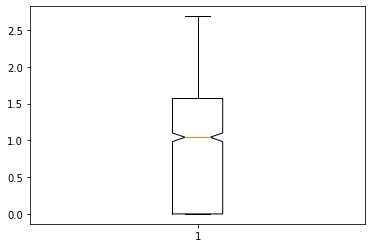

In [ ]:
plt.boxplot(log_Septicemia, 1)
plt.show()

For log values indicator box plot, we can see that there are no outliers are seen.

# Plotting bar graph for categorical column values

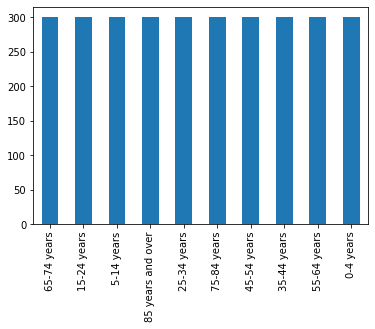

In [ ]:
df['AgeGroup'].value_counts().plot.bar()

by observing above bar graph it is clearly seen that each age group has similar death cause by various diseases.

**Univariate - categorical**

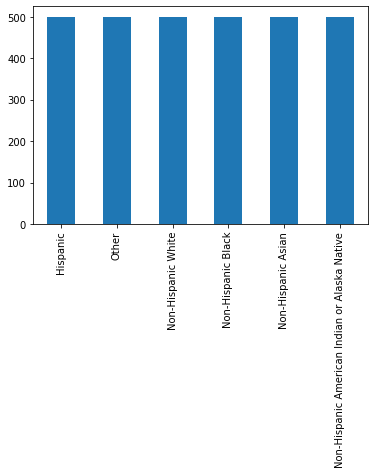

In [ ]:
df['Race.Ethnicity'].value_counts().plot.bar()

In [ ]:
df['Sex'].unique()

array(['F', 'M', 'Female', 'Male'], dtype=object)

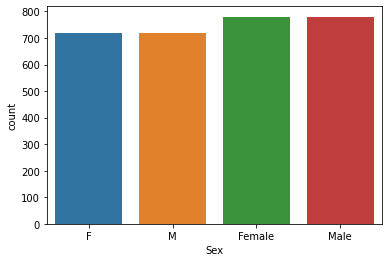

In [ ]:
sns.countplot(x = 'Sex', data = df)

# Finding CDF for age group (Bivariate)

In [ ]:
df['Sex'].describe()
Natural_Cause = df['NaturalCause'].dropna()
Natural_Cause.describe()


count     2717.000000
mean      2194.944056
std       5945.745418
min          0.000000
25%         70.000000
50%        216.000000
75%       1294.000000
max      52054.000000
Name: NaturalCause, dtype: float64

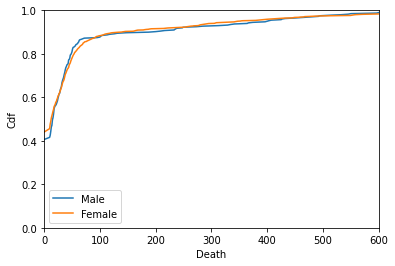

In [ ]:
male = df['Sex'] == 'M'
Natural_Cause = df['Influenza.and.pneumonia..J09.J18.']
male_death = Natural_Cause[male]
female_death = Natural_Cause[~male]
emp.Cdf.from_seq(male_death).plot(label = 'Male')
emp.Cdf.from_seq(female_death).plot(label ='Female')
plt.xlabel('Death')
plt.ylabel('Cdf')
plt.legend()
plt.axis([0,600,0,1])
plt.show()

From the above graph both male and female sex categories are almost parellel to each other. where we can see a tremondous increment are observed near 100 death count towords cdf o.4 to 0.9.

# Finding CDF for gender. (Bivariate)

In [ ]:
df['Sex'].describe()
Diabetes = df['Diabetes.mellitus..E10.E14.'].dropna()
Diabetes.describe()

count    2127.000000
mean       90.301834
std       170.424524
min         0.000000
25%         0.000000
50%        19.000000
75%        97.000000
max       984.000000
Name: Diabetes.mellitus..E10.E14., dtype: float64

As age increase death ration also increase.

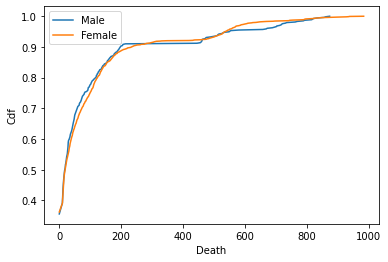

In [ ]:
male = df['Sex'] == 'M'
Diabetes = df['Diabetes.mellitus..E10.E14.']
male_death = Diabetes[male]
female_death = Diabetes[~male]
emp.Cdf.from_seq(male_death).plot(label = 'Male')
emp.Cdf.from_seq(female_death).plot(label ='Female')
plt.xlabel('Death')
plt.ylabel('Cdf')
plt.legend()
plt.show()

This data is going more towards right side. so it is now seems like normal distribution. 

# Finding CDF for gender. (Bivariate)

In [ ]:
df['Sex'].describe()
Septicemia = df['Septicemia..A40.A41.'].dropna()
Septicemia.describe()

count    1736.000000
mean       44.580069
std        88.269978
min         0.000000
25%         0.000000
50%        10.000000
75%        36.000000
max       484.000000
Name: Septicemia..A40.A41., dtype: float64

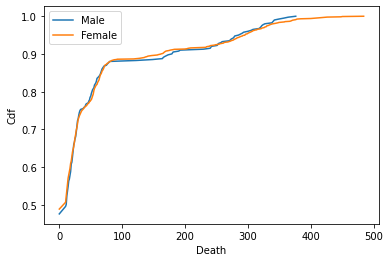

In [ ]:
male = df['Sex'] == 'M'
Septicemia = df['Septicemia..A40.A41.']
male_death = Septicemia[male]
female_death = Septicemia[~male]
emp.Cdf.from_seq(male_death).plot(label = 'Male')
emp.Cdf.from_seq(female_death).plot(label ='Female')
plt.xlabel('Death')
plt.ylabel('Cdf')
plt.legend()
plt.show()

In the above line graph, both Male and Female sex categories are almost parellel to each other in propotion to number of deaths. Where we can see rapid change are observed at the count of 100 and cdf is increased at 0.9.

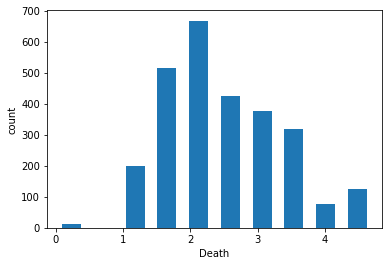

In [ ]:
l_NaturalCause = df.NaturalCause.dropna()
l_NaturalCause = np.log10(l_NaturalCause+1)
plt.hist(l_NaturalCause, rwidth = 0.6)
plt.xlabel('Death')
plt.ylabel('count')
plt.show() 

# Bivariate - Realtionship between two numeric variables

LinregressResult(slope=0.05948142118189945, intercept=-16.54193813580744, rvalue=0.9459405734311281, pvalue=0.0, stderr=0.0005031520020455584)


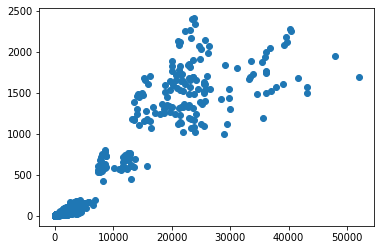

In [ ]:
from scipy.stats import linregress

subset = df.dropna(subset=['NaturalCause', 'Chronic.lower.respiratory.diseases..J40.J47.'])
xs = subset['NaturalCause']
ys = subset['Chronic.lower.respiratory.diseases..J40.J47.']
res = linregress(xs,ys)
print(res)
plt.scatter(df['NaturalCause'],df['Chronic.lower.respiratory.diseases..J40.J47.'])
plt.show()


from the above plot we can see that there is a positive relationship. and we can say that from 100  people only 5 people die due to this diseases.

**Relation between death due to sex and Other.diseases.of.respiratory.system..J00.J06.J30.J39.J67.J70.J98.**

---



LinregressResult(slope=0.5953009542129586, intercept=-14.669008773654802, rvalue=0.9222816988766018, pvalue=0.0, stderr=0.006703757039778041)


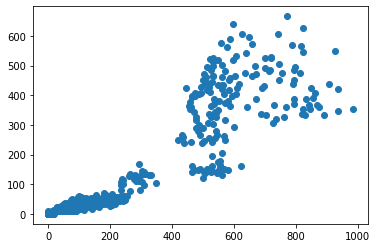

In [ ]:
from scipy.stats import linregress

subset = df.dropna(subset=['Diabetes.mellitus..E10.E14.', 'Other.diseases.of.respiratory.system..J00.J06.J30.J39.J67.J70.J98.'])
xs = subset['Diabetes.mellitus..E10.E14.']
ys = subset['Other.diseases.of.respiratory.system..J00.J06.J30.J39.J67.J70.J98.']
res = linregress(xs,ys)
print(res)
plt.scatter(nd['Diabetes.mellitus..E10.E14.'],nd['Other.diseases.of.respiratory.system..J00.J06.J30.J39.J67.J70.J98.'])
plt.show()

By observing the above plot, linear regression result is clearly mentioned where there is a positive relationship is observed.

**Two Numeric Variables**

LinregressResult(slope=4.5486289915777345, intercept=-32.74336470175456, rvalue=0.8847226655884118, pvalue=0.0, stderr=0.06474537751401645)


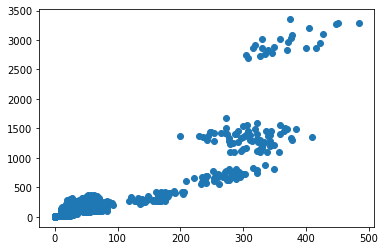

In [ ]:
from scipy.stats import linregress

subset = df.dropna(subset=['Septicemia..A40.A41.', 'Cerebrovascular.diseases..I60.I69.'])
xs = subset['Septicemia..A40.A41.']
ys = subset['Cerebrovascular.diseases..I60.I69.']
res = linregress(xs,ys)

print(res)

plt.scatter(df['Septicemia..A40.A41.'],df['Cerebrovascular.diseases..I60.I69.'])
plt.show()

From the above scatter plot, we can say that there is a positive relationship observed. Also I found corelation between two numeric variables, which are 'Septicemia' and 'Cerebrovascular' diseases.

**Relation between Cerebrovascular diseases and total death due to death by disease (Bivariate - Two numeric)**

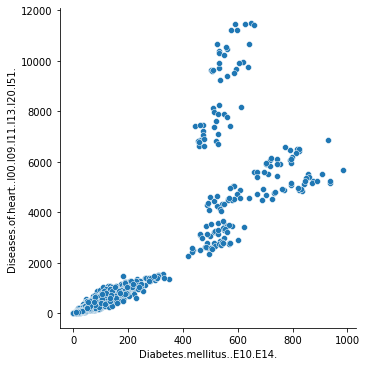

In [ ]:
sns.relplot(x = 'Diabetes.mellitus..E10.E14.', y ='Diseases.of.heart..I00.I09.I11.I13.I20.I51.', data = df)

# Bivarite - One Numeric and One Categorical variable

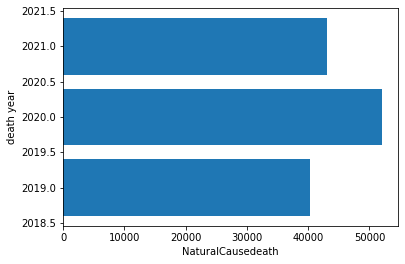

In [ ]:
from empiricaldist import Pmf
plt.barh(df['Date.Of.Death.Year'], df['NaturalCause'])
# Label the axes
plt.xlabel('NaturalCausedeath')
plt.ylabel('death year')
plt.show()

From the above visulization, we can easily see that more than 50000 deaths are identified in the year of 2020 and  its the highest among all year. 

**Relation between number of death due to Influenza and pneumonia and Age group**

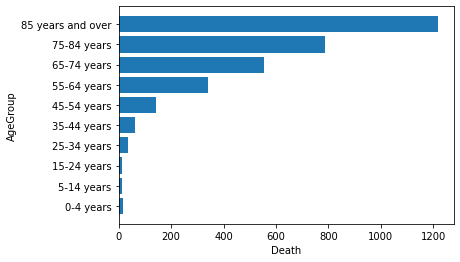

In [ ]:
from empiricaldist import Pmf
plt.barh(nd['AgeGroup'], df['Influenza.and.pneumonia..J09.J18.'])
# Label the axes
plt.xlabel('Death')
plt.ylabel('AgeGroup')
plt.show()

The Natural death rate of female are higher than in Male.

**Relation between number of death due to Chronic diseases and Age group (Bivariate - two numeric variable)**

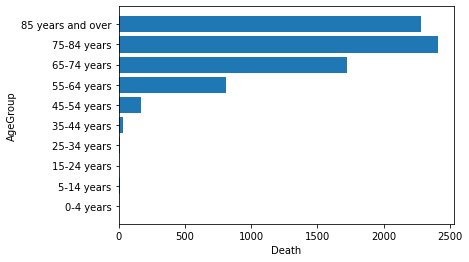

In [ ]:
from empiricaldist import Pmf
plt.barh(df['AgeGroup'], df['Chronic.lower.respiratory.diseases..J40.J47.'])
# Label the axes
plt.xlabel('Death')
plt.ylabel('AgeGroup')
plt.show()

By analyzing above visual represantation, very high death counts are identified in the age group of 75-84 years. In the contrast, very low death rate under 50 is observed in 35-44 years age group. On the other side no singke deaths are observed for below the age of 34.

In [ ]:
df['Sex'].unique()

array(['F', 'M', 'Female', 'Male'], dtype=object)

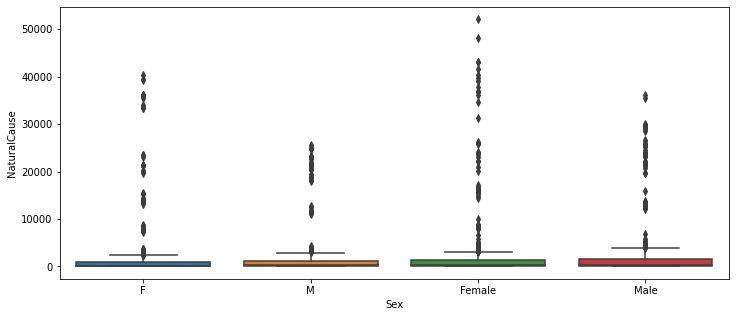

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(x = "Sex", y = "NaturalCause", data=df)